# Proyecto redes neuronales convolucionales (CNN)
## Clasificar imagen si una celula está infectada o no
Este proyecto tiene como finalidad identificar mediante un modelo Deep Learning imagenes de celulas, si estas se encuentran infectadas o no.

In [2]:
#importación de librerías
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 

In [3]:
from matplotlib.image import imread # convierte imagenes en arrays para poder visualizar

Vamos a leer los directorios donde se encuentran nuestras imagenes. En este caso, se encuentran en google drive y se dividen en imagenes de entrenamiento y testeo

In [4]:
#leyendo directorios
my_path = '/content/drive/MyDrive/curso keras_tf/REDES NEURONALES CONVOLUCIONALES (CNN)/cell_images'
test_path = my_path + '/test'
train_path = my_path + '/train'
os.listdir(train_path)

['uninfected', 'parasitized']

Tomaremos una imagen para hacer la prueba de visualizacion

In [5]:
os.listdir(train_path+'/parasitized')[10] # tomamos la primera imagen

'C99P60ThinF_IMG_20150918_141314_cell_145.png'

In [6]:
par_cell = train_path + '/parasitized'+'/C101P62ThinF_IMG_20150918_151006_cell_61.png'
imread(par_cell)[:][:10] #podemos visualizar el array que nos ha generado la funcion imread de matplotlib

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

desplegamos la imagen

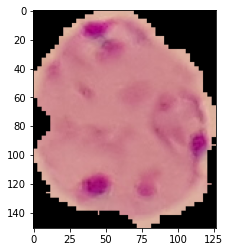

In [ ]:
plt.imshow(imread(par_cell))

In [ ]:
os.listdir(train_path+'/uninfected')[10]

'C93P54ThinF_IMG_20150821_162901_cell_147.png'

In [ ]:
unin = train_path + '/uninfected/' + 'C100P61ThinF_IMG_20150918_144348_cell_2.png'

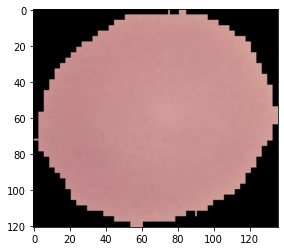

In [ ]:
plt.imshow(imread(unin))

In [ ]:
# veremos cuantos hay  
len(os.listdir(train_path +'/uninfected')), len(os.listdir(train_path + '/parasitized'))

(12480, 12480)

# no todos tienen la misma dimension.
vamos a verificar si las imagenes poseen las mismas dimensiones o no.

In [ ]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'/uninfected'):
  img = imread(test_path+'/uninfected/'+image_filename)
  d1,d2,colors = img.shape
  dim1.append(d1)
  dim2.append(d2)

Vamos a consultar y podemos observar que no poseen las mismas dimensiones

In [ ]:
dim1[:30]

[154,
 151,
 121,
 115,
 127,
 157,
 130,
 112,
 151,
 181,
 124,
 109,
 136,
 106,
 130,
 124,
 136,
 148,
 127,
 115,
 106,
 115,
 142,
 115,
 136,
 145,
 109,
 124,
 115,
 127]

Crearemos un grafico de dispersion para visualizar como estan dispersas las dimensiones y luego sacaremos el promedio de las mismas para determinar cual sera la dimension que utilizaremos

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


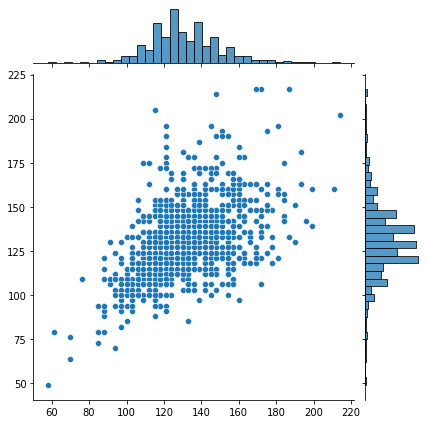

In [ ]:
sns.jointplot(dim1, dim2)

In [ ]:
# sacamos el promedio de las dos 
np.mean(dim1)

130.92538461538462

In [ ]:
np.mean(dim2)

130.75

Definiremos las dimensiones de la imagen como (130, 130, 3) 130 x 130 pixeles y 3 sera el canal de colores (rgb)

In [ ]:
img_shape = (130, 130, 3) # 130 x 130 - 3 color channels

## Procesamiento de imagenes con ImageDataGenerator
Ya sabemos cuales son las dimensiones que utilizaremos para nuestras imagenes, es hora de poder dar variedad a nuestras dimensiones o al tratamiento de las mismas al momento de realizar el entrenamiento. En este caso, esta libreria de keras nos brinda la posibilidad de modificar parametros a nuestra imagen (zoom, recortes, rotaciones) para, dicho anteriormente, brindar variedad al modelo y que no siempre sean imagenes verticales o siempre en una misma posicion

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

 estos paráámetros dependeran, en este caso estamos tratando con celulas, 
las celulas pueden estar dadas vueltas, pero en caso de reconocimiento facial, 
se aconseja no utilizar mucha rotación por el hecho de que no seria muy realista

In [ ]:
image_gen = ImageDataGenerator(rotation_range=20,#si rotamos la imagen en grados. no muy conveniente para caras
                           width_shift_range=0.1,# cambia el width en un 10%
                           height_shift_range=0.1,# cambia el height en un 10%
                           shear_range=0.1,#corta la imagen en un 10%
                           zoom_range=0.1, #hacemos zoom en un rango de 10%
                           horizontal_flip=True,#hacemos una rotacion horizontal 
                           fill_mode='nearest')#en caso de que se acorte, rellenar con pixeles que estáán al rededor


Hacemos prueba con imagen real

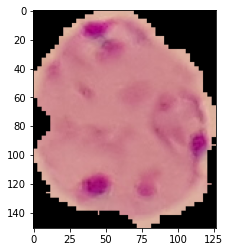

In [ ]:
par_cell_ar = imread(par_cell)
plt.imshow(par_cell_ar)

hacemos la misma prueba con imagen levemente modificada por nuestra libreria

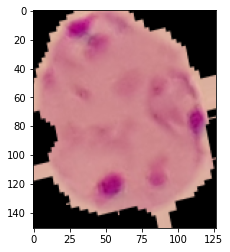

In [ ]:
plt.imshow(image_gen.random_transform(par_cell_ar))

funciona muy bien si tenemos pocos set de imagenes a evaluar, podemos transformarlas. Ahora vamos a modificar desde el directorio

## image_gen flow_from_directory: <strong> es necesario tener la carpeta dividida en subdirectorios</strong> <br> ejemplo: 
directorio madre: "celulas_train" <br> 
directorios hijos: "infectadas" / "no infectadas" y cada una tiene sus imagenes

In [ ]:
os.listdir(train_path)# vemos que tenemos dos carpetas, las cuales significa clases

['uninfected', 'parasitized']

In [ ]:
print(train_path)
image_gen.flow_from_directory(train_path)

/content/drive/MyDrive/curso keras_tf/REDES NEURONALES CONVOLUCIONALES (CNN)/cell_images/train
Found 24958 images belonging to 2 classes.


In [ ]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [ ]:
print(test_path)
image_gen.flow_from_directory(test_path)

/content/drive/MyDrive/curso keras_tf/REDES NEURONALES CONVOLUCIONALES (CNN)/cell_images/test
Found 2600 images belonging to 2 classes.


# Creacion del modelo.
En este caso, como estamos tratando con procesamiento de imagenes, vamos a crear un modelo secuencial y con capas convolucionales y de pooling para alivianar los parametros que pasan de una capa a otra (debido a la cantidad de pixeles que debe procesar)

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [ ]:
model = Sequential()
img_shape = (130, 130, 3) # 130 x 130 - 3 color channels
#conv layer
model.add(Conv2D(32, kernel_size=(3,3),input_shape=(img_shape),
                 activation='relu'))
#pool layer
model.add(MaxPool2D(pool_size=(2,2)))

#conv layer
model.add(Conv2D(64, kernel_size=(3,3),input_shape=(img_shape),
                 activation='relu'))
#pool layer
model.add(MaxPool2D(pool_size=(2,2)))

#conv layer
model.add(Conv2D(64, kernel_size=(3,3),input_shape=(img_shape),
                 activation='relu'))
#pool layer
model.add(MaxPool2D(pool_size=(2,2)))

#flatten 
model.add(Flatten())

#dense
model.add(Dense(128, activation='relu'))

#dropout
model.add(Dropout(0.5))

##OUTPUT
model.add(Dense(1, activation='sigmoid'))

#compilar 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

## Creacion de callback 
Es necesario utilizar un callback (en este caso EarlyStopping) para evitar que nuestro valor de loss aumente despues de 2 epochs (periodos de entrenamiento) o bien, se produzca un sobreajuste, lo cual no seria bueno para nuestro modelo

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early = EarlyStopping(monitor='val_loss', patience=2)

batch_size para que el modelo no se sobrecargue con tanta imagen, vamos pasando de a n cantidades de imagenes 

In [ ]:
batch_size = 16

# Vamos a tomar las imagenes con image_gen y modificamos los parametros

In [ ]:
img_shape, img_shape[:2]

((130, 130, 3), (130, 130))

In [ ]:
train_image_gen = image_gen.flow_from_directory(train_path, # direccion del path (recordar que deben estar con subdirectorios)
                                                target_size=img_shape[:2],# nuestro target_size, redimensionamiento de la imagen(32,32)
                                                color_mode='rgb', # es a color, por lo que son los 3 canales rgb
                                                batch_size=batch_size, # la cantidad de imagenes que pasaremos
                                                class_mode='binary') # tipo de clasificacion

Found 24958 images belonging to 2 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory(test_path, 
                                                target_size=img_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                shuffle=False)

Found 2600 images belonging to 2 classes.


flow generator divide las clases automaticamente.
revisamos y nuestro imageGenerator identifica automatica el nombre de la carpeta que estamos trabajando y toma ese nombre y lo identifica como "clase" (etiqueta, label)

In [ ]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

Entrenamos. <br> 
model.fit_generator(a partir del flow_directory)

In [ ]:
results = model.fit_generator(train_image_gen, epochs=20,
                              validation_data=test_image_gen,
                              callbacks=[early])

# CARGANDO MODELO Y EVALUANDO

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('/content/drive/MyDrive/curso keras_tf/REDES NEURONALES CONVOLUCIONALES (CNN)/malaria_detector.h5')

In [ ]:
model

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
#tomamos las predicciones
pred = model.predict_generator(test_image_gen)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Entrega las probabilidades de una clase u otra

In [ ]:
# devuelve las probabilidades de que sea de una clase o de otra
pred[:]

array([[0.      ],
       [0.      ],
       [0.      ],
       ...,
       [1.      ],
       [1.      ],
       [0.999748]], dtype=float32)

convertiremos nuestras predicciones en una tabla booleana.
<br> si es mayor a 0.5, entonces esta infectado (recordar que es clasificacion binaria)

In [ ]:
predictions = pred > 0.5
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
len(predictions)

2600

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# las reales, las separo el image processing
test_image_gen.classes 

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1300
           1       0.97      0.77      0.86      1300

    accuracy                           0.87      2600
   macro avg       0.89      0.87      0.87      2600
weighted avg       0.89      0.87      0.87      2600



In [ ]:
print(confusion_matrix(test_image_gen.classes, predictions))

[[1272   28]
 [ 302  998]]


## Predecir una imagen

In [ ]:
par_cell

'/content/drive/MyDrive/curso keras_tf/REDES NEURONALES CONVOLUCIONALES (CNN)/cell_images/train/parasitized/C101P62ThinF_IMG_20150918_151006_cell_61.png'

podemos desplegar una imagen con la libreria incluida en TF

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
mi_imagen = image.load_img(par_cell, target_size=img_shape)

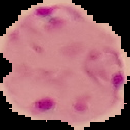

In [ ]:
mi_imagen

Vamos a dar formato a la imagen para que podamos predecirla

In [ ]:
my_img_arr = image.img_to_array(mi_imagen)

In [ ]:
my_img_arr

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
my_img_arr.shape#verificamos el shape de nuestras imagenes

(130, 130, 3)

el formato debe ser batch (1, 130, 130, 3). para ello vamos a utilizar una herramienta de numpy llamada "np.expand_dims"

In [ ]:
my_img_arr = np.expand_dims(my_img_arr, axis=0)

Volvemos a verificar

In [ ]:
my_img_arr.shape

(1, 130, 130, 3)

si solo predecimos una imagen, usaremos el predict(), sino el predict_generator

In [ ]:
model.predict(my_img_arr)

array([[0.]], dtype=float32)

In [ ]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

## Fin
Pudimos observar en este proyecto que nuestro modelo creado funciona bien, puede clasificar imagenes de celulas dañadas o no, lo cual podria ser decisivo a la hora de ayudar en la labor medica. Si bien este tipo de proyectos no buscan sustituir la persona, si ofrece la posibilidad de ayudar, de complementar con la tarea de identificacion. 